# Module 5 - Getting to know your data

Hello, and welcome to this introductory course in Machine Learning for Biomedical applications. To kick things off, I'd like to introduce you to [Weka](https://waikato.github.io/weka-wiki/downloading_weka/) one of the first Machine Learning platforms I used when I started out learning ML. Please take a minute and checkout [this great Weka video tutorial](https://waikato.github.io/weka-wiki/downloading_weka/)by Google. I think Weka is a great gateway platform that will undoubtedly take you a long way down these first steps into the ML ecosystem. In fact, Weka is still my goto platform for exploratory data analysis (EDA) which is the topic of today. Follow along the Weka example in the accompanying Lecture slides as we get to know the autism dataset distributed along with this notebook.

 ## What we learned about the autism dataset using Weka
 1. We have 292 observations and 21 features
 2. The authors have developed a model using Demographics and 10 Yes/No questions to score patients for autism.
 3. Some features contain missing values.
 4. Appears the "relation" categorical variable was filled in by hand and has typos.
 5. Ethinicity for example is not uniformly sampled. Most patients are white.
 6. Most patients are 4yrs old or 11 with few patients in between.
 7. 2/3 of patients are Male.
 8. We can train a model with 100% accuracy using only the 10 yes/no questions.

**Questions**
+ How would you interpret the value of author's score metric? 
+ What is the precision and sensitivity of the author's model?
+ In our trained model using only the 10 yes/no questions, What score does a patient start off with before we start considering the answers to the 10 yes/no questions?
+ What score would a new patient get if they answers yes for all 10 question? 

## What question am I answering?

When getting to know new data try to think about the following questions:
+ Why was the data collected? 
+ How the data was intended to be used?
+ Who was the author? This can inform your understanding of the data’s purpose.
+ What does the literature say?
    + Cohorts and datasets are often well studied.
    + What seem to be the important features, the clinical need they focus on.
+ What do the values in the data represent?
+ What are the values trying to represent?
+ **What potential added value does this data have for the greater clinical need?** 

A lot of this preliminary work is going to be done by hand and driven by your understanding of the subject matter. It is easy to underestimate how much effort this will take especially if the subject is outside of your wheelhouse. Only after you complete this critical step should you begin to formulate your central question. Skipping this due diligence is a common pitfall leading poor or at the very least unimpactful science. So, it is not enough to ask
*"What relationship can I demonstrate with this data?"*, rather, you should have a benchmark in mind you want to overcome __*because*__ you have this data.

For example, let's say the clinical standard for diagnosing some disease is through a biopsy. A well accepted rubric exists that quantifies the level of pathology in the tissue sample based on some histological metrics. But, you have accompanying urine analysis data not utilized by the benchmark model and also have evidence suggesting it has some prognostic potential.

You can:
1. Demonstrate a gain in prognostic strength by adding urine markers to the benchmark model.
2. Demonstrate the urine analysis is a more cost effective predictor than the invasive biopsy.
3. Demonstrate a relationship between the urine markers and the underlying histological features to improve the decision makeing process dictating when a biopsy is performed.
4. Inferr a causal relationship between the urine markers and histological features to make statements about the pathology progression.

Each analysis will require the data to be formatted in its own way.

# Exercise

In this excercise we will tidy up the 21 variables in Autism data. We will then build a predictive model to predict the binary YES/NO Autism diagnosis. To format we will:
+ Load the autism data in .arff format to a pandas dataframe
+ Check all categorical features have consistent annotations - ie. no typos
+ Have no missing values
+ Remove uninformative features
+ Report a "table 1" of patient characteristics

## Requirements
Let's begin by installing all the packages we'll need for this excercise. It's also good to set the random number seed first thing too so we can reproduce the results.

In [1]:
# requirements
!pip install scipy
!pip install pandas
!pip install numpy
!pip install tableone
!pip install matplotlib

# Globals
seed = 1017

## Load the data
Ideally, data should be loaded from a repostitory and acceced programmatically for the sake of transparancy and reproducibility. The best analyses are totally divorced from the source data. We don't have that here. Today we will be reading a data file distributed allong with this excercise.  

In [2]:
from scipy.io import arff

#Read the arff file with scipy.io.arrff.loadarrf which returns the data and metadata
data, meta = arff.loadarff('data/Autism-Child-Data.arff')

#the metadata contains information such as name and type of attributes along with value ranges

In [3]:
#let's look at the meta data
display(meta)

Dataset: child
	A1_Score's type is nominal, range is ('0', '1')
	A2_Score's type is nominal, range is ('0', '1')
	A3_Score's type is nominal, range is ('0', '1')
	A4_Score's type is nominal, range is ('0', '1')
	A5_Score's type is nominal, range is ('0', '1')
	A6_Score's type is nominal, range is ('0', '1')
	A7_Score's type is nominal, range is ('0', '1')
	A8_Score's type is nominal, range is ('0', '1')
	A9_Score's type is nominal, range is ('0', '1')
	A10_Score's type is nominal, range is ('0', '1')
	age's type is numeric
	gender's type is nominal, range is ('m', 'f')
	ethnicity's type is nominal, range is ('Others', 'Middle Eastern ', 'White-European', 'Black', 'South Asian', 'Asian', 'Pasifika', 'Hispanic', 'Turkish', 'Latino')
	jundice's type is nominal, range is ('no', 'yes')
	austim's type is nominal, range is ('no', 'yes')
	contry_of_res's type is nominal, range is ('Jordan', 'United States', 'Egypt', 'United Kingdom', 'Bahrain', 'Austria', 'Kuwait', 'United Arab Emirates', 'Eur

In [4]:
#the feature names and types can also be accessed as arrays
display(meta.names())
display(meta.types())

['A1_Score',
 'A2_Score',
 'A3_Score',
 'A4_Score',
 'A5_Score',
 'A6_Score',
 'A7_Score',
 'A8_Score',
 'A9_Score',
 'A10_Score',
 'age',
 'gender',
 'ethnicity',
 'jundice',
 'austim',
 'contry_of_res',
 'used_app_before',
 'result',
 'age_desc',
 'relation',
 'Class/ASD']

['nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'numeric',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'nominal',
 'numeric',
 'nominal',
 'nominal',
 'nominal']

In [5]:
#the data is loaded as a record array accessible by attribute names
#but it might be more convenient to convert it to a pandas dataframe 
import pandas as pd
import numpy as np
df = pd.DataFrame(data)

In [6]:
#Let's look at the data
display(df)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Others',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
1,b'1',b'1',b'0',b'0',b'1',b'1',b'0',b'1',b'0',b'0',...,b'm',b'Middle Eastern ',b'no',b'no',b'Jordan',b'no',5.0,b'4-11 years',b'Parent',b'NO'
2,b'1',b'1',b'0',b'0',b'0',b'1',b'1',b'1',b'0',b'0',...,b'm',b'?',b'no',b'no',b'Jordan',b'yes',5.0,b'4-11 years',b'?',b'NO'
3,b'0',b'1',b'0',b'0',b'1',b'1',b'0',b'0',b'0',b'1',...,b'f',b'?',b'yes',b'no',b'Jordan',b'no',4.0,b'4-11 years',b'?',b'NO'
4,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'Others',b'yes',b'no',b'United States',b'no',10.0,b'4-11 years',b'Parent',b'YES'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',b'1',...,b'f',b'White-European',b'yes',b'yes',b'United Kingdom',b'no',10.0,b'4-11 years',b'Parent',b'YES'
288,b'1',b'0',b'0',b'0',b'1',b'0',b'1',b'0',b'0',b'1',...,b'f',b'White-European',b'yes',b'yes',b'Australia',b'no',4.0,b'4-11 years',b'Parent',b'NO'
289,b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'0',b'0',b'1',...,b'm',b'Latino',b'no',b'no',b'Brazil',b'no',7.0,b'4-11 years',b'Parent',b'YES'
290,b'1',b'1',b'1',b'0',b'1',b'1',b'1',b'1',b'1',b'1',...,b'm',b'South Asian',b'no',b'no',b'India',b'no',9.0,b'4-11 years',b'Parent',b'YES'


In [7]:
#Those 'b' are python's way of displaying a bytes array and are not part of the data
#They indicate you're treating a byte string, litterally a sequence of octets, which are ASCII cahracters.
#They will appear only in nominal features. The numeric features "age" and "result" will not have them.
#You can decode them using .decode("utf-8")

#Let's decode only the nominal features
for i in range(len(meta.types())):
    if meta.types()[i] == 'nominal':
        df[meta.names()[i]] = df[meta.names()[i]].str.decode('utf-8')    


In [8]:
#let's look at the data now
display(df)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,Others,no,no,Jordan,no,5.0,4-11 years,Parent,NO
1,1,1,0,0,1,1,0,1,0,0,...,m,Middle Eastern,no,no,Jordan,no,5.0,4-11 years,Parent,NO
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,Jordan,yes,5.0,4-11 years,?,NO
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,Jordan,no,4.0,4-11 years,?,NO
4,1,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10.0,4-11 years,Parent,YES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,White-European,yes,yes,United Kingdom,no,10.0,4-11 years,Parent,YES
288,1,0,0,0,1,0,1,0,0,1,...,f,White-European,yes,yes,Australia,no,4.0,4-11 years,Parent,NO
289,1,0,1,1,1,1,1,0,0,1,...,m,Latino,no,no,Brazil,no,7.0,4-11 years,Parent,YES
290,1,1,1,0,1,1,1,1,1,1,...,m,South Asian,no,no,India,no,9.0,4-11 years,Parent,YES


## Heal annotations

Recall the 'Self' vs 'self' typo for the 'relation' variable.
One easy fix is to convert all strings to lowercase.

In [9]:
# convert all nominal variable string elements to lowercase.
for i in range(len(meta.types())):
    if meta.types()[i] == 'nominal':
        df[meta.names()[i]] = df[meta.names()[i]].str.lower()    

#let's look at the data now
display(df)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,...,m,others,no,no,jordan,no,5.0,4-11 years,parent,no
1,1,1,0,0,1,1,0,1,0,0,...,m,middle eastern,no,no,jordan,no,5.0,4-11 years,parent,no
2,1,1,0,0,0,1,1,1,0,0,...,m,?,no,no,jordan,yes,5.0,4-11 years,?,no
3,0,1,0,0,1,1,0,0,0,1,...,f,?,yes,no,jordan,no,4.0,4-11 years,?,no
4,1,1,1,1,1,1,1,1,1,1,...,m,others,yes,no,united states,no,10.0,4-11 years,parent,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,...,f,white-european,yes,yes,united kingdom,no,10.0,4-11 years,parent,yes
288,1,0,0,0,1,0,1,0,0,1,...,f,white-european,yes,yes,australia,no,4.0,4-11 years,parent,no
289,1,0,1,1,1,1,1,0,0,1,...,m,latino,no,no,brazil,no,7.0,4-11 years,parent,yes
290,1,1,1,0,1,1,1,1,1,1,...,m,south asian,no,no,india,no,9.0,4-11 years,parent,yes


## Treat Missing

Treating missing values generally falls into one of two strategies:
1. A mask that globally indicates missing values.
2. A sentinel value that indicates a missing entry.

In the **mask** approach, it might be a same-sized Boolean array representation or use one bit to represent the local state of missing entry. This requires allocations of an additional Boolean array which adds memory and computational overhead. This 

In the **sentinel** value approach, a tag value is used for indicating the missing value, such as NaN (Not a Number), null or a special value which is part of the programming language. This limits the range of valid values that can be represented and may require extra logic in CPU and GPU arithmetic.

Here we will use the sentinel approach but later we will use masks for image processing in the computer vision project. Pandas use sentinels to handle missing values, specifically Pandas use two already-existing Python null values:
+ the python None object
+ the floating-point NaN value

None is a Python ‘object’ data that is often used for missing data. Because it is a Python object, None cannot be used in any arbitrary NumPy/Pandas array, but only in arrays with data type ‘object’. Notice the dtype in following integer numpy array created with a None element. 

In [10]:
arr1 = np.array([[1,2,3],
                [4,None,6]])
arr1


array([[1, 2, 3],
       [4, None, 6]], dtype=object)

Because the array is of type object you will generally get an error if you perform aggregations like sum() or min().

In [11]:
#uncomment to show error
#np.sum(arr1, axis = 0)

NaN is an acronym for 'Not a Number' and a special floating-point value in the standard IEEE floating-point representation. Notice the type of the array if initialize it with a NaN instead of None.

In [12]:
arr2 = np.array([[1,2,3],
                [4,np.nan,6]])
arr2.dtype


dtype('float64')

NaN is specifically a floating-point value; there is no such thing for integers, strings or other types. Also, be aware that regardless of the operations, the result of arithmetic with NaN will be another NaN. For example,

In [13]:
#aggreating arrays with np.nan elements
np.sum(arr2, axis = 0)

array([ 5., nan,  9.])

Pandas is built to handle the None and NaN nearly interchangeably, converting between them where appropriate. For types that don’t have an available sentinel value, Pandas automatically type-casts when NaN values are present. Notice the difference in type in the following pandas series. 

In [14]:
iseries = pd.Series([0, 1, 2])
aseries = pd.Series(["a", "b", "c"])
display(iseries)
display(aseries)

0    0
1    1
2    2
dtype: int64

0    a
1    b
2    c
dtype: object

In [15]:
iseries[1]= None
aseries[1]= None
display(iseries)
display(aseries)

0    0.0
1    NaN
2    2.0
dtype: float64

0       a
1    None
2       c
dtype: object

In [16]:
iseries[2]= np.nan
aseries[2]= np.nan
display(iseries)
display(aseries)

0    0.0
1    NaN
2    NaN
dtype: float64

0       a
1    None
2     NaN
dtype: object

Often missing values don't come in nice and clean with None or np.nan values. If we know what kind of characters used as missing values in the dataset, we can handle them while creating the DataFrame using na_values parameter `df = pd.read_csv("source.csv", na_values = ['?', '&'])`

However, since we already have the data loaded we will have to edit the dataframe ourselves. In our case we need to replace the '?' characters used to indicate missing data in the arff file with None. Pandas will atutomatically type-cast to NaNs for the numeric variables while keeping None for the categorical variables. This can be accomplished with the pandas replace() function.

In [17]:
#replace all "?" with None objects
df = df.replace({ "?": None })   

In [18]:
#Now show summary stats for each feature
for i in range(len(meta.types())):
    display("--------------")
    display(df[[meta.names()[i]]].describe())
    display(df[[meta.names()[i]]].value_counts()) 

'--------------'

,A1_Score
count,292
unique,2
top,1
freq,185


A1_Score
1           185
0           107
dtype: int64

'--------------'

,A2_Score
count,292
unique,2
top,1
freq,156


A2_Score
1           156
0           136
dtype: int64

'--------------'

,A3_Score
count,292
unique,2
top,1
freq,217


A3_Score
1           217
0            75
dtype: int64

'--------------'

,A4_Score
count,292
unique,2
top,1
freq,161


A4_Score
1           161
0           131
dtype: int64

'--------------'

,A5_Score
count,292
unique,2
top,1
freq,217


A5_Score
1           217
0            75
dtype: int64

'--------------'

,A6_Score
count,292
unique,2
top,1
freq,208


A6_Score
1           208
0            84
dtype: int64

'--------------'

,A7_Score
count,292
unique,2
top,1
freq,177


A7_Score
1           177
0           115
dtype: int64

'--------------'

,A8_Score
count,292
unique,2
top,0
freq,147


A8_Score
0           147
1           145
dtype: int64

'--------------'

,A9_Score
count,292
unique,2
top,0
freq,148


A9_Score
0           148
1           144
dtype: int64

'--------------'

,A10_Score
count,292
unique,2
top,1
freq,212


A10_Score
1            212
0             80
dtype: int64

'--------------'

,age
count,288.000000
mean,6.354167
std,2.365456
min,4.000000
25%,4.000000
50%,6.000000
75%,8.000000
max,11.000000


age 
4.0     92
5.0     45
6.0     39
7.0     27
11.0    26
8.0     21
9.0     20
10.0    18
dtype: int64

'--------------'

,gender
count,292
unique,2
top,m
freq,208


gender
m         208
f          84
dtype: int64

'--------------'

,ethnicity
count,249
unique,10
top,white-european
freq,108


ethnicity      
white-european     108
asian               46
middle eastern      27
south asian         21
black               14
others              14
latino               8
hispanic             7
pasifika             2
turkish              2
dtype: int64

'--------------'

,jundice
count,292
unique,2
top,no
freq,212


jundice
no         212
yes         80
dtype: int64

'--------------'

,austim
count,292
unique,2
top,no
freq,243


austim
no        243
yes        49
dtype: int64

'--------------'

,contry_of_res
count,292
unique,52
top,united kingdom
freq,49


contry_of_res        
united kingdom           49
united states            42
india                    42
australia                23
jordan                   20
new zealand              13
egypt                     9
united arab emirates      7
canada                    7
bangladesh                6
philippines               4
saudi arabia              4
pakistan                  4
libya                     3
iraq                      3
russia                    3
qatar                     3
syria                     3
armenia                   3
south africa              2
turkey                    2
mexico                    2
malaysia                  2
lebanon                   2
afghanistan               2
georgia                   2
austria                   2
italy                     2
bahrain                   2
brazil                    2
europe                    1
u.s. outlying islands     1
bhutan                    1
sweden                    1
south korea               

'--------------'

,used_app_before
count,292
unique,2
top,no
freq,281


used_app_before
no                 281
yes                 11
dtype: int64

'--------------'

,result
count,292.000000
mean,6.239726
std,2.284882
min,0.000000
25%,5.000000
50%,6.000000
75%,8.000000
max,10.000000


result
7.0       44
8.0       44
5.0       41
6.0       40
4.0       33
9.0       32
3.0       21
10.0      21
2.0        9
1.0        6
0.0        1
dtype: int64

'--------------'

,age_desc
count,292
unique,1
top,4-11 years
freq,292


age_desc  
4-11 years    292
dtype: int64

'--------------'

,relation
count,249
unique,4
top,parent
freq,214


relation                
parent                      214
relative                     17
health care professional     13
self                          5
dtype: int64

'--------------'

,Class/ASD
count,292
unique,2
top,no
freq,151


Class/ASD
no           151
yes          141
dtype: int64

### Counting the missing values
Pandas has two useful methods for detecting missing values: isnull() and notnull() . Either one will return a Boolean mask over the data. For example:
df.isnull() returns a Boolean same-sized DataFrame indicating if values are missing

In [19]:
#display the sum of missing values for each feature
display(df.isnull().sum())

A1_Score            0
A2_Score            0
A3_Score            0
A4_Score            0
A5_Score            0
A6_Score            0
A7_Score            0
A8_Score            0
A9_Score            0
A10_Score           0
age                 4
gender              0
ethnicity          43
jundice             0
austim              0
contry_of_res       0
used_app_before     0
result              0
age_desc            0
relation           43
Class/ASD           0
dtype: int64

### Brutal approach
You can use dropna() to remove missing values. You can specify to drop either rows or columns with missing data by specifying the axis.

In [20]:
display(df.shape)
display(df.dropna(axis=0, inplace=False).shape)
display(df.dropna(axis=1, inplace=False).shape)

(292, 21)

(248, 21)

(292, 18)

### OK approach
You can use fillna()to fill in missing values. It has extra arugments
+ value: value to use to replace NaN
+ method: method to use for replacing NaN. method='ffill' does the forward replacement. method='bfill' does the backword replacement.

In [21]:
# replaces missing values with values in the previous row
display(df.fillna(axis=0, method='ffill', inplace=False).shape)
# replaces missing values with a constant
display(df.fillna(axis=0, value=0, inplace=False).shape)

(292, 21)

(292, 21)

### Better approach
The other common replacement is to replace missing values with the mean for continuous variables or median for categorical ones. Median works for both so let's just go with that.

In [22]:
df.fillna(value=df.median(axis=1, skipna=True), inplace=True)

## Remove uninformative variables
 If all observations have the same value for a particular feature then that feature cannot help discriminate among the observations. These variables should be removed. In later modules we will elaborate on this idea of informative variables when we discuss feature selection.

In [23]:
#print the number of unique values per feature
for i in range(len(meta.names())):
    display(meta.names()[i] +" has "+str(df[meta.names()[i]].nunique()))

'A1_Score has 2'

'A2_Score has 2'

'A3_Score has 2'

'A4_Score has 2'

'A5_Score has 2'

'A6_Score has 2'

'A7_Score has 2'

'A8_Score has 2'

'A9_Score has 2'

'A10_Score has 2'

'age has 8'

'gender has 2'

'ethnicity has 10'

'jundice has 2'

'austim has 2'

'contry_of_res has 52'

'used_app_before has 2'

'result has 11'

'age_desc has 1'

'relation has 4'

'Class/ASD has 2'

Looks like 'age_desc' has only one value. Let's remove it.

In [24]:
#remove variables with one unique value
for col in df.columns:
    if df[col].nunique() == 1:
        #drop the column
        print(col)
        df.drop([col], axis=1, inplace=True)

#display the remaining columns
display(df.columns)

age_desc


Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

Finally, we should remove the 'result' variable provided by the authors. We can't use this data to predict.

**Challenge: Remove the 'result' column from the dataframe.**

In [25]:
#write code here

#this line should confirm the column has been removed 
display(df.columns)

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

## Generating a Table 1
Often in a biomedical paper the first table is a summary of the study population characteristics. Not only will your reviewers expect it, generating it is actually very useful to distill your understanding of the problem you propose to tackle. Fortunately there are many packages out there that will generate a table 1 for you. Here we will use the cleverly named 'tableone' package and stratify our summary based on the autism outcome.

In [26]:
from tableone import TableOne
TableOne(df, groupby="Class/ASD", pval=True, dip_test=True, normal_test=True, tukey_test=True)

Grouped by Class/ASD                                            
                                                             Missing     Overall          no         yes P-Value
n                                                                            292         151         141        
A1_Score, n (%)        0                                           0  107 (36.6)   83 (55.0)   24 (17.0)  <0.001
                       1                                              185 (63.4)   68 (45.0)  117 (83.0)        
A2_Score, n (%)        0                                           0  136 (46.6)   87 (57.6)   49 (34.8)  <0.001
                       1                                              156 (53.4)   64 (42.4)   92 (65.2)        
A3_Score, n (%)        0                                           0   75 (25.7)   64 (42.4)    11 (7.8)  <0.001
                       1                                              217 (74.3)   87 (57.6)  130 (92.2)        
A4_Score, n (%)        0                                           0  131 (44.9)  109 (72.2)   22 (15.6)  <0.001
                       1                                              161 (55.1)   42 (27.8)  119 (84.4)        
A5_Score, n (%)        0                                           0   75 (25.7)   63 (41.7)    12 (8.5)  <0.001
                       1                                              217 (74.3)   88 (58.3)  129 (91.5)        
A6_Score, n (%)        0                                           0   84 (28.8)   71 (47.0)    13 (9.2)  <0.001
                       1                                              208 (71.2)   80 (53.0)  128 (90.8)        
A7_Score, n (%)        0                                           0  115 (39.4)   79 (52.3)   36 (25.5)  <0.001
                       1                                              177 (60.6)   72 (47.7)  105 (74.5)        
A8_Score, n (%)        0                                           0  147 (50.3)  108 (71.5)   39 (27.7)  <0.001
                       1                                              145 (49.7)   43 (28.5)  102 (72.3)        
A9_Score, n (%)        0                                           0  148 (50.7)  112 (74.2)   36 (25.5)  <0.001
                       1                                              144 (49.3)   39 (25.8)  105 (74.5)        
A10_Score, n (%)       0                                           0   80 (27.4)   70 (46.4)    10 (7.1)  <0.001
                       1                                              212 (72.6)   81 (53.6)  131 (92.9)        
age, mean (SD)                                                     4   6.4 (2.4)   6.2 (2.2)   6.5 (2.5)   0.201
gender, n (%)          f                                           0   84 (28.8)   46 (30.5)   38 (27.0)   0.594
                       m                                              208 (71.2)  105 (69.5)  103 (73.0)        
ethnicity, n (%)       asian                                      43   46 (18.5)   24 (19.5)   22 (17.5)   0.058
                       black                                            14 (5.6)     5 (4.1)     9 (7.1)        
                       hispanic                                          7 (2.8)     1 (0.8)     6 (4.8)        
                       latino                                            8 (3.2)     3 (2.4)     5 (4.0)        
                       middle eastern                                  27 (10.8)   19 (15.4)     8 (6.3)        
                       others                                           14 (5.6)     9 (7.3)     5 (4.0)        
                       pasifika                                          2 (0.8)     1 (0.8)     1 (0.8)        
                       south asian                                      21 (8.4)   13 (10.6)     8 (6.3)        
                       turkish                                           2 (0.8)     2 (1.6)                    
                       white-european                                 108 (43.4)   46 (37.4) 

### Exploring the warnings
Chi-squared test is used to see whether distributions of categorical variables differ from each another. Looks like the statistics for country, relation, and ethnicity variables are poor so we cannot say one way or another if the distributions are different.

Normality test informs you which variables are not normally distributed. Often one would report the median and inter-quartile ranges instead of the mean and standard deviation for these variables.

Tukey's rule is a method to find outliers among continuous variables. None were found here but we would visualize this this in a boxplot. To demonstrate, we'll create box plots for age.

Hartigan's Dip Test is a test for multimodality. The test has suggested that the age  distribution may be multimodal. We'll plot the distributions too and have a look.

In [27]:
import matplotlib.pyplot as plt

/Users/daniel00/miniconda3/envs/condasandbox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/daniel00/miniconda3/envs/condasandbox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


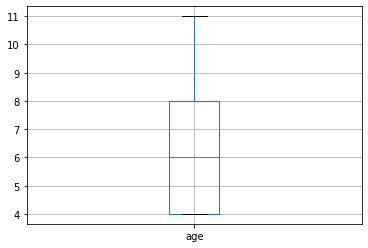

In [28]:
#box plots
df[['age']].boxplot(whis=3)
plt.show()

/Users/daniel00/miniconda3/envs/condasandbox/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(0.0, 15.0)

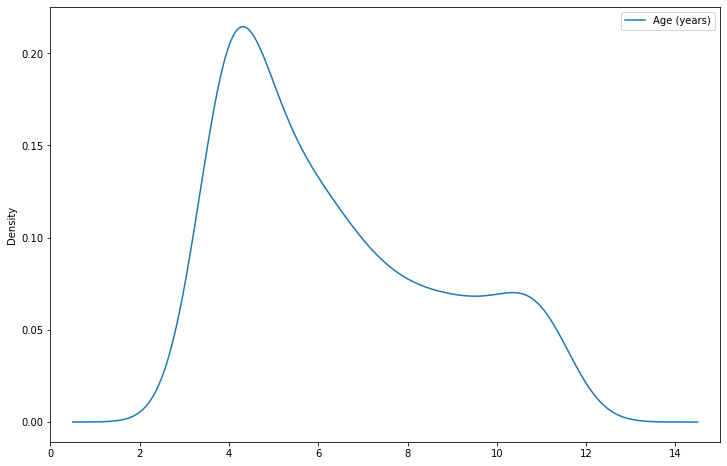

In [29]:
#distributions
df[['age']].dropna().plot.kde(figsize=[12,8])
plt.legend(['Age (years)', 'result(score)'])
plt.xlim([0,15])

When the distribution has distinct humps like this then one might consider binning them to convert them into categorical features.

**Challenge - Bin the age variable to categories 'child' and 'adolecent' with cut off at 8 years old and regenerate your Table 1** 